In [11]:
import scanpy as sc

In [12]:
adata = sc.read_h5ad(r"C:\Users\visiu\Documents\pyqt5_proj\P4_marmoset_test_brain.hdf5")
adata

AnnData object with n_obs × n_vars = 102018 × 315
    obs: 'region', 'slide', 'cell_id', 'area', 'leiden', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.50', 'leiden_res_1.00', 'leiden_res_1.50', 'leiden_res_2.00', 'cell_type_1', 'cell_type_2'
    uns: 'cell_type_1_colors', 'cell_type_2_colors', 'leiden', 'leiden_colors', 'leiden_res_0.05', 'leiden_res_0.05_colors', 'leiden_res_0.10', 'leiden_res_0.10_colors', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'leiden_res_2.00', 'leiden_res_2.00_colors', 'neighbors', 'pca', 'sopa_attrs', 'spatial_neighbors', 'spatialdata_attrs', 'umap'
    obsm: 'X_pca', 'X_umap', 'intensities', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [14]:
adata.obs['cell_type_2'].unique()

['Ast_4', 'Inh_VIP', 'Ex_L4', 'Ex_L5_1', 'Ex_L5_2', ..., 'Ex_Thalamus_DLG_3', 'Ex_Habenula', 'Inh_PV_1', 'Ex_Thalamus_3', 'Micro_2']
Length: 39
Categories (39, object): ['Ex_L5_1', 'Ex_L2_3_1', 'Ex_L2_3_2', 'Ex_L4', ..., 'Inh_PV_1', 'Inh_PV_2', 'Non_annotated', 'Micro_2']

In [20]:
adata.var_names

Index(['ABI3', 'ABI3BP', 'ADAMTS3', 'ADAMTS9', 'ADARB2', 'ADORA2A', 'ADORA2B',
       'ANLN', 'ANTXR1', 'AQP4',
       ...
       'VCAN', 'VIP', 'VIPR2', 'VXN', 'WHRN', 'YBX3', 'ZIC1', 'ZIC2', 'ZIC4',
       'ZNF385D'],
      dtype='object', length=315)

In [28]:
math.ceil(math.sqrt(7))

3

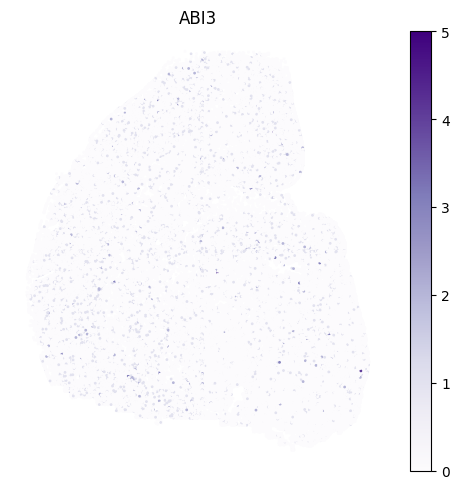

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import math

# 유전자 리스트
#gene_list = ['ABI3', 'ABI3BP', 'ADAMTS3', 'ADAMTS9', 'ADARB2', 'ADORA2A', 'ADORA2B']  # 유전자 리스트를 유동적으로 수정
gene_list = ['ABI3', 'ABI3BP']  # 유전자 리스트를 유동적으로 수정

# Extract x and y coordinates from adata
x_coords = adata.obsm['spatial'][:, 0]
y_coords = adata.obsm['spatial'][:, 1]

# Calculate the center of the plot
center_x = (x_coords.max() + x_coords.min()) / 2
center_y = (y_coords.max() + y_coords.min()) / 2

rotation_matrix = np.array([
    [np.cos(np.pi/2), -np.sin(np.pi/2)],
    [np.sin(np.pi/2), np.cos(np.pi/2)]
])
rotated_coords = np.dot(np.vstack([x_coords-center_x, y_coords-center_y]).T, rotation_matrix)
rotated_x_coords = rotated_coords[:, 0] + center_x
rotated_y_coords = rotated_coords[:, 1] + center_y

# 유전자 리스트의 길이
num_genes = len(gene_list)

# 서브플롯의 행과 열 계산 (가장 가까운 정수로 설정)
cols = num_genes % 4
rows = math.ceil(num_genes / cols)

# figure와 서브플롯 생성
if num_genes > 1:
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axs = axs.flat  # flat을 사용하여 1D로 접근 가능하게 변환
else:
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    axs = [ax]  # 리스트로 변환하여 일관된 처리 가능

# 서브플롯을 순차적으로 채우기
for i, gene in enumerate(gene_list):
    ax = axs[i]  # flat을 사용하여 1D로 접근
    
    # 유전자 발현 데이터 추출
    gene_expression = adata[:, gene].X.toarray().flatten()
    
    # 플롯 생성
    scatter = ax.scatter(rotated_x_coords, rotated_y_coords, 
                         c=gene_expression, cmap='Purples', s=1)
    
    # 서브플롯 타이틀 및 설정
    ax.set_title(f'{gene}')
    ax.axis('off')  # 좌표축 숨김
    
    # 각 서브플롯에 색상 막대 추가
    plt.colorbar(scatter, ax=ax)

# 빈 서브플롯이 있을 경우 제거
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()
